In [2]:
import os
import sys
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
sys.path.append('/home/local/VANDERBILT/litz/github/MASILab/thoraxtools/')
from func.vis import vis

In [9]:
root_dir ="/home/litz/data/TotalSegmentator/dataset_rand"
seg_dir = "/home/litz/data/TotalSegmentator/dataset_rand_merged/"
scanid = "00001110time20180201"
raw = nib.load(os.path.join(root_dir, scanid, "ct.nii.gz")).get_fdata()
seg = nib.load(os.path.join(seg_dir, f"{scanid}.nii.gz")).get_fdata()
seg = np.flip(seg, axis=0)

In [10]:
def clip_RAS(img, xyz):
    x, y , z = xyz
    img = np.flip(img, axis=0)
    clip_sag = img[x, :, :]
    clip_sag = np.flip(clip_sag, 0)
    clip_sag = np.rot90(clip_sag)
    clip_cor = img[:, y, :]
    clip_cor = np.rot90(clip_cor)
    clip_ax = img[:, :, z]
    clip_ax = np.rot90(clip_ax)
    return (clip_sag, clip_cor, clip_ax)

def vis_overlay_slices(img, label, xyz, orientation="LAS", label_orientation="LAS", cmap="turbo", clip_range=(-1024, 600), mask_range=(0,5)):
    label = np.where(label == 0, np.nan, label)
    img_clip_sag, img_clip_cor, img_clip_ax = vis.clip_LAS(img, xyz) if orientation == "LAS" else clip_RAS(img, xyz)
    label_clip_sag, label_clip_cor, label_clip_ax = vis.clip_LAS(label, xyz) if label_orientation == "LAS" else clip_RAS(label,
                                                                                                               xyz)
    if len(clip_range) > 0:
        vmin = clip_range[0]
        vmax = clip_range[1]
    else:
        vmax = np.max(img)
        vmin = np.min(img)
    f, ax = plt.subplots(1, 3, figsize=(15, 15))

    sag = ax[0].imshow(img_clip_sag, interpolation='bilinear', cmap="gray", alpha=1.0, vmin=clip_range[0],
                       vmax=clip_range[1])
    ax[0].imshow(label_clip_sag, interpolation='none', cmap=cmap, alpha=0.5, vmin=mask_range[0], vmax=mask_range[1])
    ax[1].imshow(img_clip_cor, interpolation='bilinear', cmap="gray", alpha=1.0, vmin=clip_range[0], vmax=clip_range[1])
    ax[1].imshow(label_clip_cor, interpolation='none', cmap=cmap, alpha=0.5, vmin=mask_range[0], vmax=mask_range[1])
    ax[2].imshow(img_clip_ax, interpolation='bilinear', cmap="gray", alpha=1.0, vmin=clip_range[0], vmax=clip_range[1])
    ax[2].imshow(label_clip_ax, interpolation='none', cmap=cmap, alpha=0.5, vmin=mask_range[0], vmax=mask_range[1])


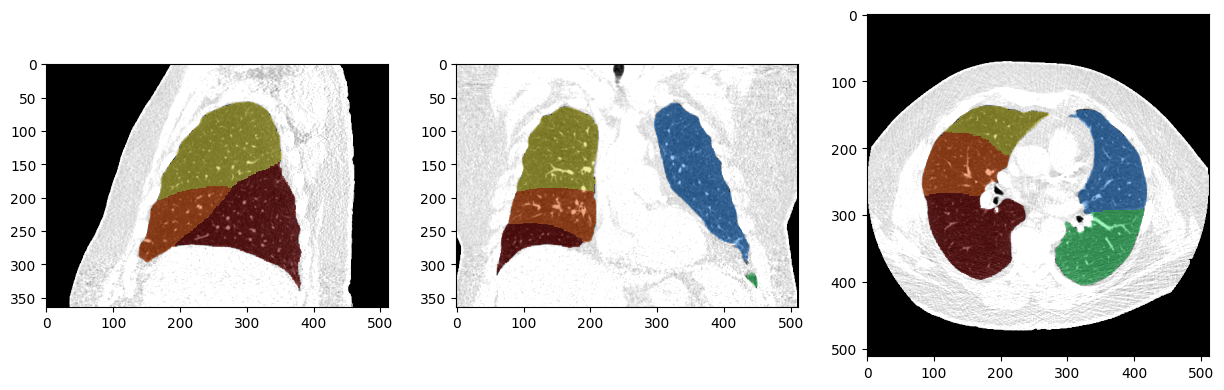

In [11]:
xyz = (125, 281, 161)
vis_overlay_slices(raw, seg, xyz, orientation="LAS", label_orientation="RAS", cmap="turbo", clip_range=(-1000,0))
# vis_overlay_slices(raw, rml, xyz, orientation="LAS", label_orientation="RAS", cmap="turbo")
# vis_overlay_slices(raw, rul, xyz, orientation="LAS", label_orientation="RAS", cmap="turbo")
# vis_overlay_slices(raw, rml, xyz, orientation="LAS",  label_orientation="RAS",cmap="turbo")

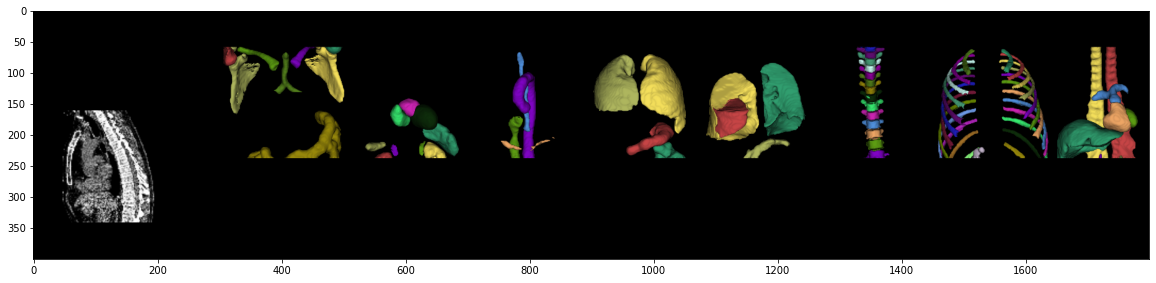

In [74]:
import matplotlib.image as mpimg
preview_img = mpimg.imread(os.path.join(root_dir, "preview.png"))
plt.figure(figsize=(20,20))
plt.imshow(preview_img)